<a href="https://colab.research.google.com/github/niyathimariya/churn-modelling/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [ ]:
data = pd.read_excel("P3- Churn-Modelling Data.xlsx")

# 1. Customer Demographics Analysis

# 1.1 Distribution of Customers Across Different Age Groups and Gender Distribution

# Distribution of customers across different age groups

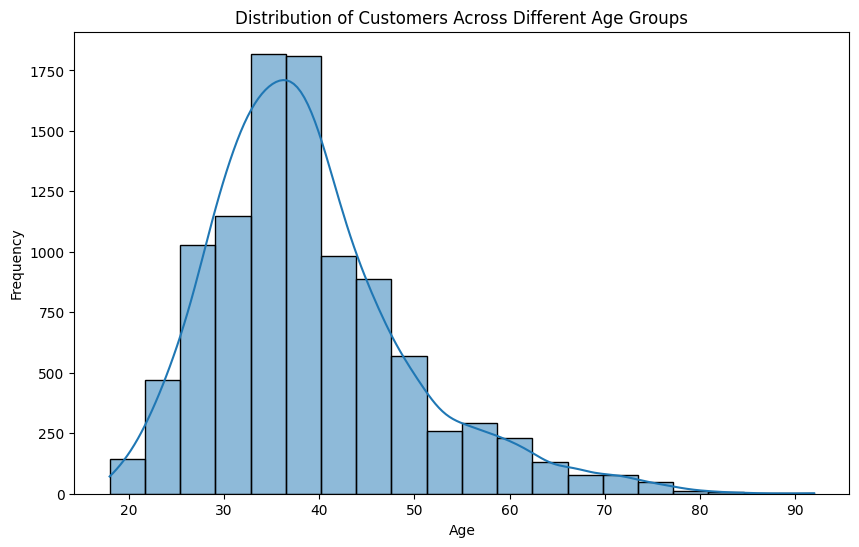

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Customers Across Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The age distribution shows a concentration of customers between 30 and 40 years old, with fewer customers in the younger (under 20) and older (over 60) age groups.

# Analyze the gender distribution of customers

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(data['Gender'])
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

NameError: name 'plt' is not defined

There is a slightly higher number of male customers compared to female customers.

# 2. Churn Analysis

# 2.1 Percentage of Customers Who Have Churned

In [ ]:
churn_rate = data['churned'].mean() * 100

NameError: name 'data' is not defined

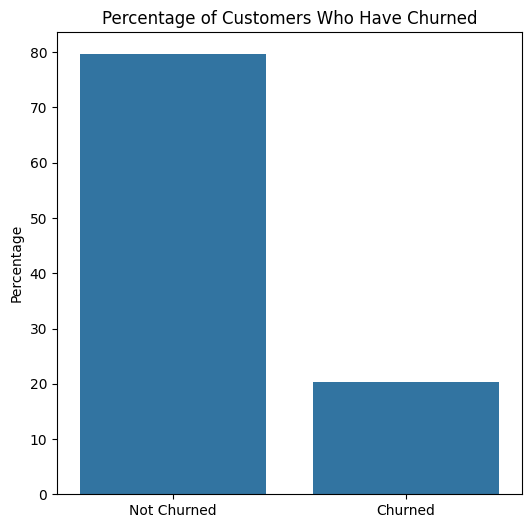

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x=['Not Churned', 'Churned'], y=[100 - churn_rate, churn_rate])
plt.title('Percentage of Customers Who Have Churned')
plt.ylabel('Percentage')
plt.show()

Approximately 20.3% of customers have churned.

# 2.2 Patterns and Trends Among Customers Who Have Churned

#Age distribution of churned vs. non-churned customers

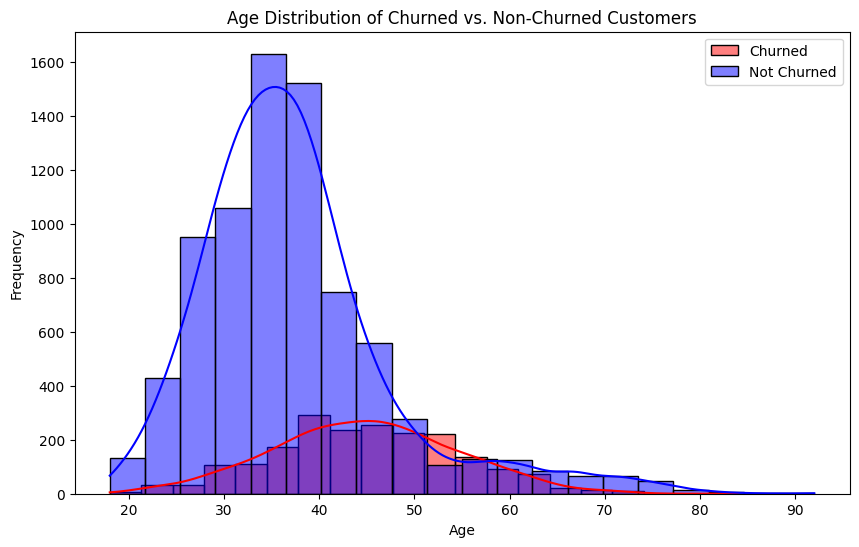

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['churned'] == 1]['Age'], bins=20, color='red', label='Churned', kde=True)
sns.histplot(data[data['churned'] == 0]['Age'], bins=20, color='blue', label='Not Churned', kde=True)
plt.title('Age Distribution of Churned vs. Non-Churned Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Among Young Adults (20-30 years) there is a relatively small proportion of churned customers in this age group. Younger customers seem to be more loyal or satisfied with the service.
Older Adults (40-50 years) has a significant number of churned customers.

# Gender distribution of churned vs. non-churned customers

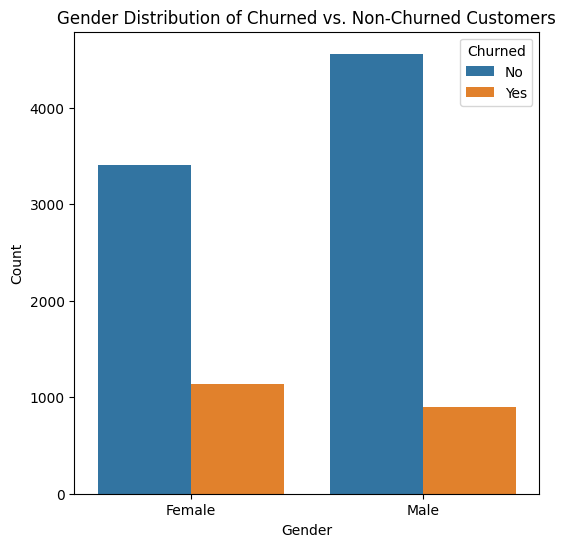

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', hue='churned', data=data)
plt.title('Gender Distribution of Churned vs. Non-Churned Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churned', labels=['No', 'Yes'])
plt.show()

 Female customers have a higher churn rate compared to males, suggesting a need for targeted retention strategies to address this issue

# Geography distribution of churned vs. non-churned customers

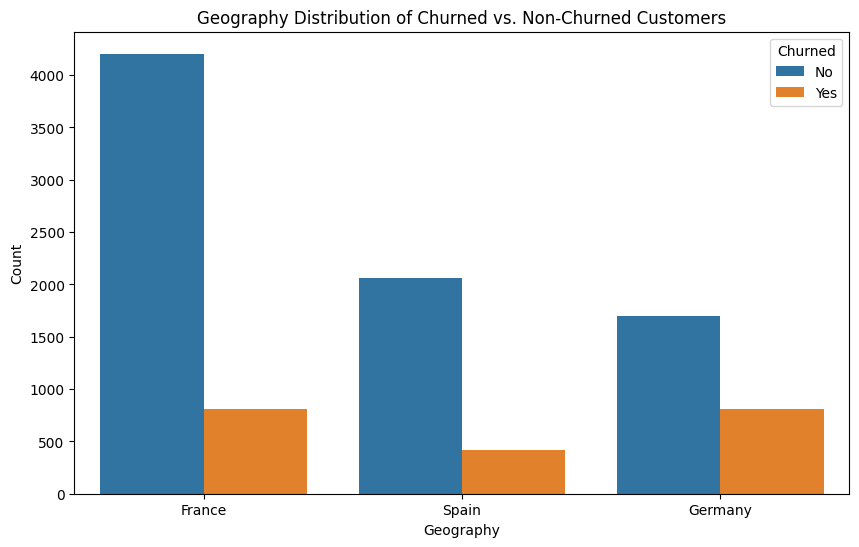

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', hue='churned', data=data)
plt.title('Geography Distribution of Churned vs. Non-Churned Customers')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Churned', labels=['No', 'Yes'])
plt.show()

France has the highest number of customers overall, with a significant portion of non-churned customers, while Germany have fewer customers with higher propotion of churn rate.

# Tenure distribution of churned vs. non-churned customers

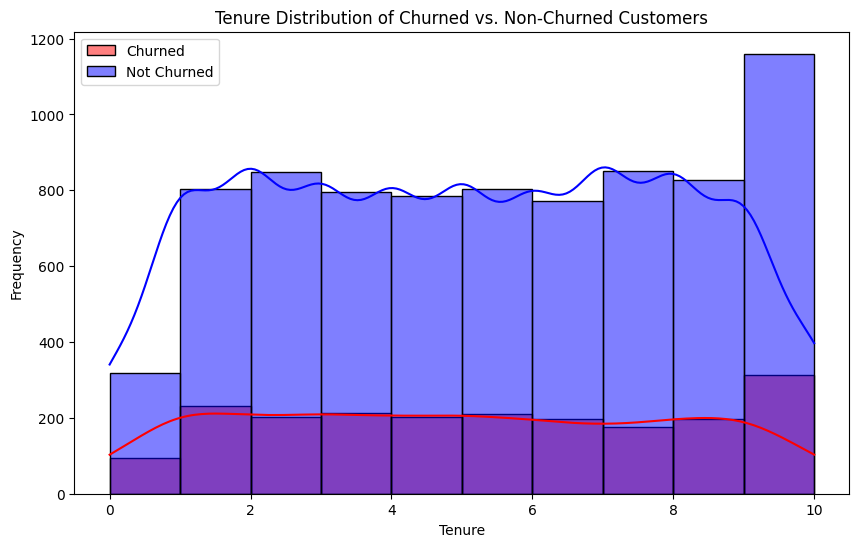

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['churned'] == 1]['Tenure'], bins=10, color='red', label='Churned', kde=True)
sns.histplot(data[data['churned'] == 0]['Tenure'], bins=10, color='blue', label='Not Churned', kde=True)
plt.title('Tenure Distribution of Churned vs. Non-Churned Customers')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.show()

While the number of non-churned customers is consistently higher across all tenure periods, the proportion of churned customers remains relatively stable, with a slight increase at tenure levels of 9 and 10.

# 3. Product Usage Analysis

# 3.1 Most commonly used products

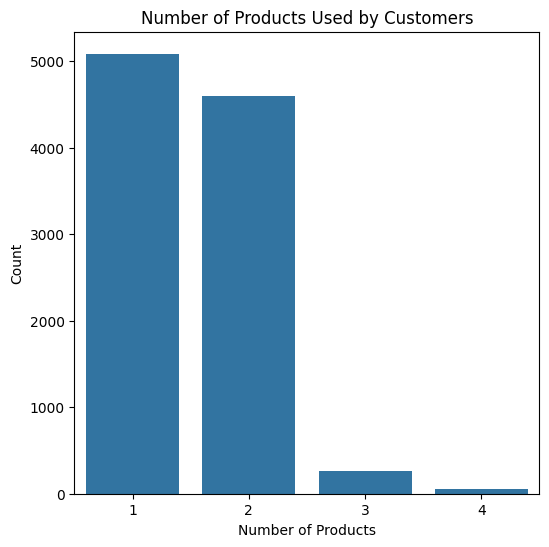

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='NumOfProducts', data=data)
plt.title('Number of Products Used by Customers')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

A larger proportion of customers purchased 1 or 2 products

# Product usage by customer segments

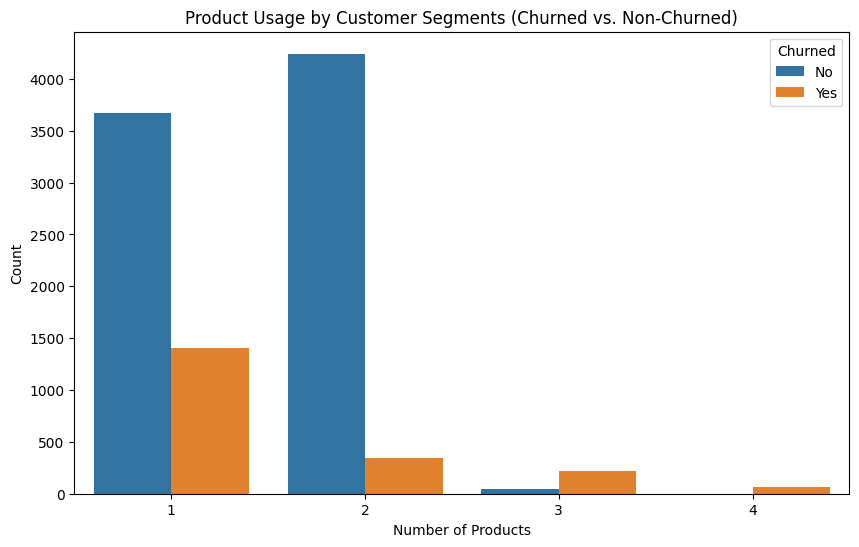

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NumOfProducts', hue='churned', data=data)
plt.title('Product Usage by Customer Segments (Churned vs. Non-Churned)')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Churned', labels=['No', 'Yes'])
plt.show()

Larger portion of customers have brought either 1 or 2 products. The churn rate is comparetively lower for customers who have brought 2 products.

# 4. Financial Analysis

# Average Account Balance and Comparison of Financial Characteristics

In [ ]:
average_balance = data['Balance'].mean()
print(average_balance)

76485.889288


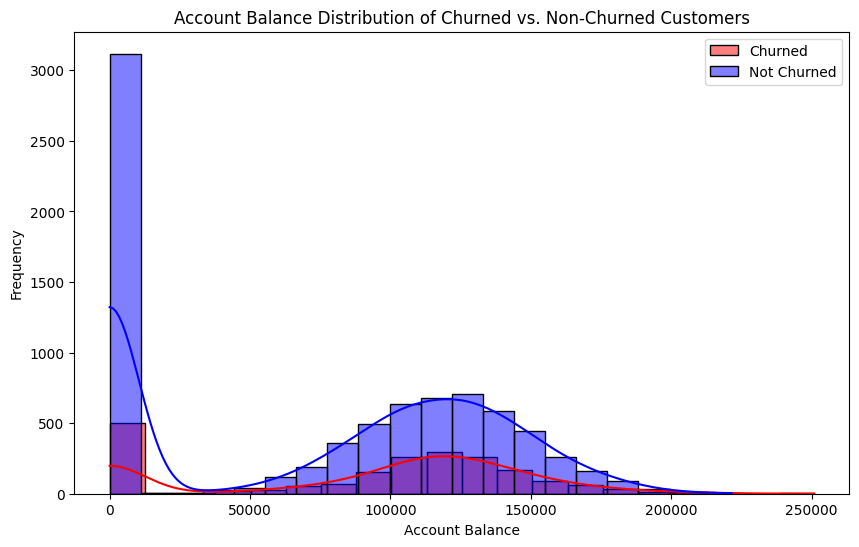

In [ ]:
# Compare account balances of churned vs. non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data[data['churned'] == 1]['Balance'], bins=20, color='red', label='Churned', kde=True)
sns.histplot(data[data['churned'] == 0]['Balance'], bins=20, color='blue', label='Not Churned', kde=True)
plt.title('Account Balance Distribution of Churned vs. Non-Churned Customers')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Non-Churned Customers: The majority have account balances concentrated at very low values (close to 0), with a significant number also distributed around the mid-range balances (50,000 to 150,000).

Churned Customers: These customers are more evenly distributed across the account balance spectrum, with fewer at low balances compared to non-churned customers, and a noticeable peak around mid-range balances.

# 5. Predictive Modeling

# Significant Predictors and Predictive Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Preparing the data

In [ ]:
X = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'churned'])
X = pd.get_dummies(X, drop_first=True)
y = data['churned']

# Spliting the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a Random Forest model

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Predicting on the test set

In [ ]:
y_pred = model.predict(X_test)

# Evaluating the model

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.75      0.47      0.58       584

    accuracy                           0.87      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.86      0.87      0.85      3000

[[2326   90]
 [ 311  273]]


# Feature importance

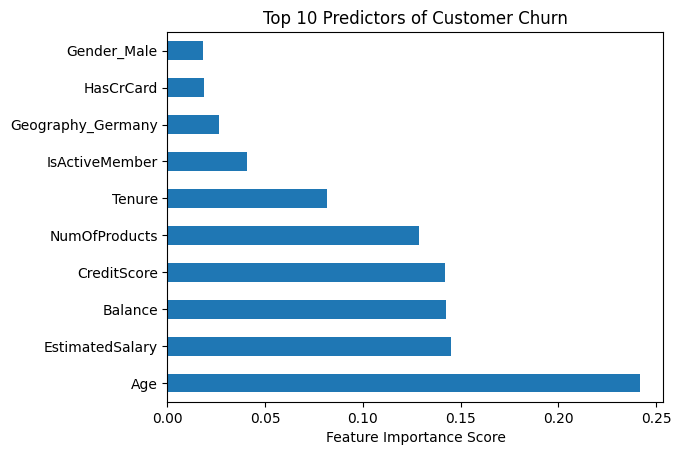

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Predictors of Customer Churn')
plt.xlabel('Feature Importance Score')
plt.show()

Age, estimated salary, and balance are the top three predictors of customer churn, indicating that older customers with higher salaries and significant balances are more likely to churn.